In [23]:
import numpy as np
import pandas as pd                                                                                                                             
import sklearn
import matplotlib.pyplot as plt


In [24]:
# read in data from sample file
df = pd.read_csv('bank.csv')
df.head() # show the first five rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
dict = {
    'no': 0,
    'yes': 1
}
df['y'] = df['y'].map(dict)


In [26]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['job']=label.fit_transform(df['job'])
df['marital']=label.fit_transform(df['marital'])
df['default']=label.fit_transform(df['default'])
df['housing']=label.fit_transform(df['housing'])
df['loan']=label.fit_transform(df['loan'])
df['contact']=label.fit_transform(df['contact'])
df['month']=label.fit_transform(df['month'])
df['day_of_week']=label.fit_transform(df['day_of_week'])
df['poutcome']=label.fit_transform(df['poutcome'])
df['education']=label.fit_transform(df['education'])

In [27]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [28]:
df=df.drop(columns=['contact','poutcome'])
df = df.dropna()

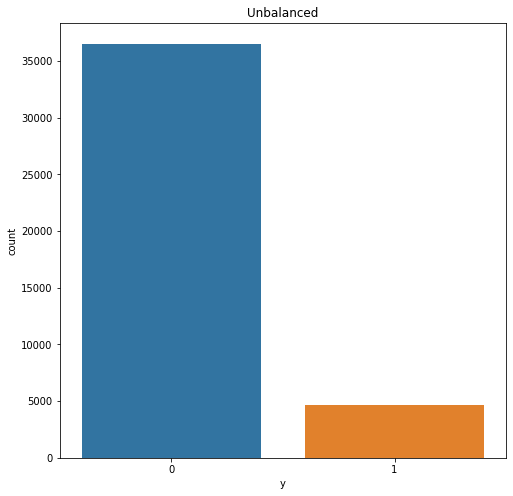

In [29]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot('y', data=df)
plt.title('Unbalanced')
plt.show()

In [30]:
# Class count
count_class_0, count_class_1 = df['y'].value_counts()

# Divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

Random over-sampling:
1    36548
0    36548
Name: y, dtype: int64


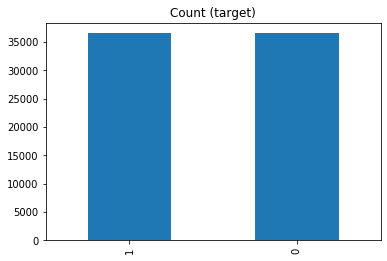

In [31]:
# shuffled_df=df.sample(frac=1,random_state=4)
# yes_df=shuffled_df.loc[shuffled_df['y']== 1]
# no_df=shuffled_df.loc[shuffled_df['y']== 0].sample(n=4640,random_state=42)
# normalized_df=pd.concat([yes_df,no_df])

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
normalized_df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(normalized_df['y'].value_counts())

normalized_df['y'].value_counts().plot(kind='bar', title='Count (target)');

In [32]:
df['y'].value_counts()


0    36548
1     4640
Name: y, dtype: int64

In [33]:
data = normalized_df[['nr.employed','emp.var.rate','euribor3m','previous','education','default','age']] 
target = normalized_df['y'] # this is like the dependent variable: y
data.head()

,nr.employed,emp.var.rate,euribor3m,previous,education,default,age
0,5191.0,1.1,4.857,0,0,0,56
1,5191.0,1.1,4.857,0,3,1,57
2,5191.0,1.1,4.857,0,3,0,37
3,5191.0,1.1,4.857,0,1,0,40
4,5191.0,1.1,4.857,0,3,0,56


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
#x_train

In [37]:
#x_test

In [38]:
#_train

In [39]:
#y_test

In [40]:
y_pred = dt.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8599115326736285

In [42]:
print(y_pred) # what the model predict entertainment labels
print(y_test)

[1 0 1 ... 1 1 0]
38426    1
10543    0
40985    1
27811    1
40005    1
17073    0
39734    1
40046    1
4548     0
39216    1
31345    0
39106    1
33773    1
14431    0
1110     0
13659    0
36055    0
8603     1
7159     0
2757     0
19372    1
10530    0
6165     0
7903     0
38924    0
17609    0
40612    1
34318    0
41018    1
37425    1
        ..
19152    1
7342     0
30468    1
28221    0
10184    1
4043     0
37290    1
40356    1
40384    1
2179     0
30059    1
39869    1
21991    1
33735    0
39636    1
30458    1
41123    1
20788    1
40526    0
30532    0
39827    1
28406    1
37990    0
34845    0
7594     0
23115    0
39784    1
40046    1
40742    0
31243    0
Name: y, Length: 21929, dtype: int64


In [43]:
from sklearn import tree
# import graphviz
# from graphviz import Source

# Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) 